In [2]:
pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ------- -------------------------------- 122.9/614.7 kB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/614.7 kB 2.8 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/614.7 kB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 481.3/614.7 kB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 593.9/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 2.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.8 MB 2.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/2.8 MB 2.1 MB/s eta 

## START MODELLING HERE

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/household_power_consumption_cleaned.csv',index_col='Date', parse_dates=True)
#parse_dates=True
print('Shape of data',df.shape)
df.head()

Shape of data (256869, 8)


,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2007-01-01,2024-06-05 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01,2024-06-05 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01,2024-06-05 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01,2024-06-05 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01,2024-06-05 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [4]:
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

what column should 

1. Drop:
- time


2. Create
- sub_metering_avg


Plot the data

<Axes: xlabel='Date'>

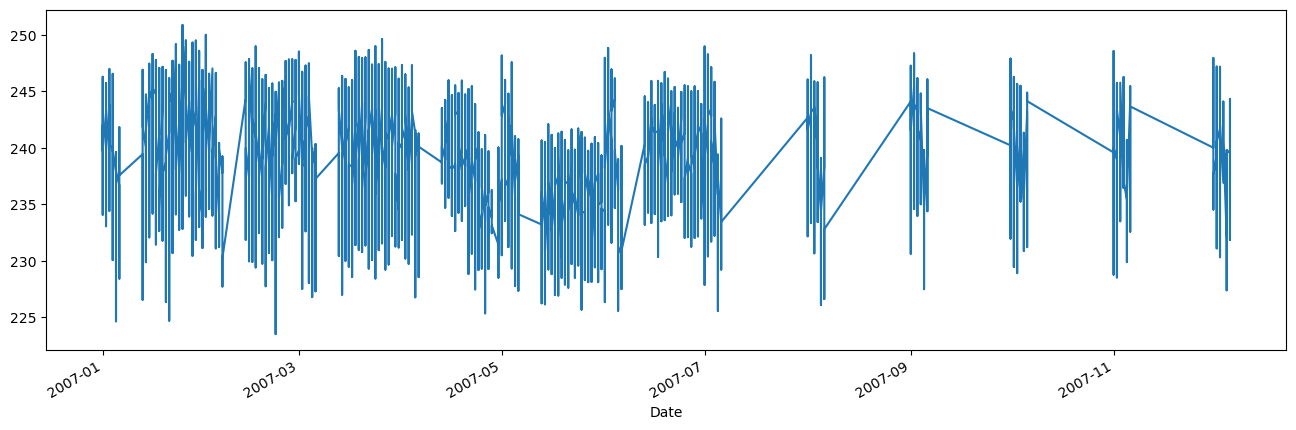

In [9]:
df['Voltage'].plot(figsize=(16,5))

this data look stationary

check for stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [11]:
df.columns

Index(['Time', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [12]:
adf_test(df['Sub_metering_3'])
#take too long to run,keep the value as reminder

1. ADF :  -32.538128389013714
2. P-Value :  0.0
3. Num Of Lags :  55
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 256813
5. Critical Values :
	 1% :  -3.4303754635293537
	 5% :  -2.8615512545567685
	 10% :  -2.5667759903935465


adf_test(df['Sub_metering_3'])
1. ADF :  -32.538128389013714
2. P-Value :  0.0
3. Num Of Lags :  55
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 256813
5. Critical Values :
	 1% :  -3.4303754635293537
	 5% :  -2.8615512545567685
	 10% :  -2.5667759903935465

ADF:
p-value: probability, it should be as small as possible(must be smaller 0.05)
n.of lag:

Figure out order for ARIMA model

In [13]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
stepwise_fit = auto_arima(df['Sub_metering_3'], 
                          suppress_warnings=True)           

stepwise_fit.summary()
#6.40

MemoryError: Unable to allocate 11.8 MiB for an array with shape (6, 256869) and data type float64

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Split data into Train-Test-Split(TTS)

In [ ]:
print(df.shape)
train=df.iloc[:-30]  #
test=df.iloc[-30:]   #
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])  #

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

Make prediction on the Test set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)